# Imputação dos dados na base de dados suja

### Importando as principais bibliotecas

In [76]:
import numpy as np
import pandas as pd

### Leitura do csv

In [77]:
import numpy as np
import pandas as pd

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)
matches_info_df

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,B365D_classification_0,B365D_classification_1,B365D_classification_2,B365D_classification_3,B365D_classification_4,B365A_classification_0,B365A_classification_1,B365A_classification_2,B365A_classification_3,B365A_classification_4
0,0.090909,0.473684,-0.953510,-0.871429,-0.680040,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.272727,-0.263158,-0.741112,-0.928571,-0.953862,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.272727,-0.368421,-0.923428,-0.914286,-0.830491,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.454545,-0.894737,-0.868733,-0.942857,-0.905717,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.636364,-1.000000,-0.504102,-0.857143,-0.975426,0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,-0.571429,-0.504514,0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,-0.454545,0.473684,-0.979945,-0.500000,-0.504514,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,-0.090909,-0.578947,-0.965360,-0.750000,-0.629890,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
378,-0.090909,0.684211,-0.896080,-0.928571,-0.880642,0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
# Identificação das colunas com valores nulos e contagem dos valores nulos
null_counts = matches_info_df.isnull().sum()

# Filtragem das colunas que possuem valores nulos
null_counts = null_counts[null_counts > 0]

# Print das colunas com valores nulos e suas respectivas contagens
print(null_counts)

# como home_shots_2_score foi uma coluna nossa criada entao ta safe essa

home_team_shots_on_target_dirty    114
home_shots_2_score                  86
dtype: int64


In [79]:
matches_info_df.home_team_shots_on_target_dirty.describe()
# dados antes das operaçoes com dados ausentes

count    266.000000
mean      -0.207519
std        0.353636
min       -1.000000
25%       -0.466667
50%       -0.200000
75%        0.033333
max        1.000000
Name: home_team_shots_on_target_dirty, dtype: float64

### Dropando colunas que nao serão uteis para a analise da inputação de chutes a gol

In [80]:
matches_info_df = matches_info_df.drop(['home_season_shots','home_season_shots_on_target','home_team_shots_on_target_original','away_team_goal_count','B365H', 'B365D', 'B365A', 'away_team_shots', 'away_team_shots_on_target', 'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_fouls', 'away_team_fouls', 'B365H_log', 'B365D_log', 'home_shots_2_score', 'home_team_name_AFC Bournemouth', 'home_team_name_Arsenal', 'home_team_name_Brighton & Hove Albion', 'home_team_name_Burnley', 'home_team_name_Cardiff City', 'home_team_name_Chelsea', 'home_team_name_Crystal Palace', 'home_team_name_Everton', 'home_team_name_Fulham', 'home_team_name_Huddersfield Town', 'home_team_name_Leicester City', 'home_team_name_Liverpool', 'home_team_name_Manchester City', 'home_team_name_Manchester United', 'home_team_name_Newcastle United', 'home_team_name_Southampton', 'home_team_name_Tottenham Hotspur', 'home_team_name_Watford', 'home_team_name_West Ham United', 'home_team_name_Wolverhampton Wanderers', 'away_team_name_AFC Bournemouth', 'away_team_name_Arsenal', 'away_team_name_Brighton & Hove Albion', 'away_team_name_Burnley', 'away_team_name_Cardiff City', 'away_team_name_Chelsea', 'away_team_name_Crystal Palace', 'away_team_name_Everton', 'away_team_name_Fulham', 'away_team_name_Huddersfield Town', 'away_team_name_Leicester City', 'away_team_name_Liverpool', 'away_team_name_Manchester City', 'away_team_name_Manchester United', 'away_team_name_Newcastle United', 'away_team_name_Southampton', 'away_team_name_Tottenham Hotspur', 'away_team_name_Watford', 'away_team_name_West Ham United', 'away_team_name_Wolverhampton Wanderers', 'home_team_goal_count_half_time_0', 'home_team_goal_count_half_time_1', 'home_team_goal_count_half_time_2', 'home_team_goal_count_half_time_3', 'home_team_goal_count_half_time_4', 'home_team_goal_count_secondhalf_time_0', 'home_team_goal_count_secondhalf_time_1', 'home_team_goal_count_secondhalf_time_2', 'home_team_goal_count_secondhalf_time_3', 'home_team_goal_count_secondhalf_time_4', 'away_team_goal_count_half_time_0', 'away_team_goal_count_half_time_1', 'away_team_goal_count_half_time_2', 'away_team_goal_count_half_time_3', 'away_team_goal_count_secondhalf_time_0', 'away_team_goal_count_secondhalf_time_1', 'away_team_goal_count_secondhalf_time_2', 'away_team_goal_count_secondhalf_time_3', 'away_team_goal_count_secondhalf_time_4', 'season_part_first', 'season_part_last', 'season_part_mid', 'day_or_night_Day', 'day_or_night_Night', 'home-80-final_False', 'home-80-final_True', 'away-80-final_False', 'away-80-final_True', '80-final_False', '80-final_True', 'referee_Andre Marriner', 'referee_Andy Madley', 'referee_Anthony Taylor', 'referee_Chris Kavanagh', 'referee_Craig Pawson', 'referee_David Coote', 'referee_Graham Scott', 'referee_Jonathan Moss', 'referee_Kevin Friend', 'referee_Lee Mason', 'referee_Lee Probert', 'referee_Martin Atkinson', 'referee_Michael Oliver', 'referee_Mike Dean', 'referee_Paul Tierney', 'referee_Roger East', 'referee_Simon Hooper', 'referee_Stuart Attwell', 'dirty_0', 'dirty_1'
, 'B365H_classification_0', 'B365H_classification_1', 'B365H_classification_2', 'B365H_classification_3', 'B365H_classification_4', 'B365D_classification_0', 'B365D_classification_1', 'B365D_classification_2', 'B365D_classification_3', 'B365D_classification_4', 'B365A_classification_0', 'B365A_classification_1', 'B365A_classification_2', 'B365A_classification_3', 'B365A_classification_4'
], axis=1)
matches_info_df

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
0,0.090909,0.473684,0.157895,-1.000000,-1.000000,-0.333333,-0.384615,-0.764706,-0.066667,0.056359
1,-0.272727,-0.263158,0.684211,-1.000000,-1.000000,-0.666667,-0.153846,-0.647059,NaN,-0.666900
2,0.272727,-0.368421,-0.789474,-1.000000,-1.000000,-0.333333,-0.153846,-0.176471,-0.333333,-0.227414
3,-0.454545,-0.894737,-0.157895,-1.000000,-1.000000,-1.000000,-0.153846,-0.411765,-0.066667,-0.452657
4,-0.636364,-1.000000,0.789474,-1.000000,-1.000000,-1.000000,-0.538462,-0.764706,-0.733333,-0.798399
...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,0.368421,0.853333,-0.146667,-0.333333,-0.153846,-0.529412,-0.200000,0.269118
376,-0.454545,0.473684,-0.789474,0.333333,-0.593333,-1.000000,0.615385,0.294118,0.466667,0.269118
377,-0.090909,-0.578947,-1.000000,-0.186667,-0.780000,-0.666667,-0.461538,-0.529412,-0.466667,0.125889
378,-0.090909,0.684211,0.263158,0.373333,-0.293333,-0.333333,-0.307692,-0.176471,-0.466667,-0.367024


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the covariance matrix for the selected numeric columns
corr_matrix = matches_info_df.corr('spearman')
corr_matrix

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
result,1.000000,0.447593,-0.375821,0.273234,-0.196324,0.807843,0.372580,0.146393,0.513414,0.529997
performance_rank_home,0.447593,1.000000,-0.052632,0.662761,0.004600,0.372538,0.299043,0.207139,0.417605,0.650890
away_performance_rank,-0.375821,-0.052632,1.000000,-0.011191,0.762647,-0.274403,-0.387484,-0.333996,-0.314402,-0.690207
Pre-Match PPG (Home),0.273234,0.662761,-0.011191,1.000000,0.218623,0.250378,0.155004,0.148545,0.242074,0.453351
Pre-Match PPG (Away),-0.196324,0.004600,0.762647,0.218623,1.000000,-0.133620,-0.275323,-0.209002,-0.231375,-0.533720
home_team_goal_count,0.807843,0.372538,-0.274403,0.250378,-0.133620,1.000000,0.390270,0.083770,0.565907,0.416232
home_team_shots,0.372580,0.299043,-0.387484,0.155004,-0.275323,0.390270,1.000000,0.517106,0.703186,0.475246
home_team_corner_count,0.146393,0.207139,-0.333996,0.148545,-0.209002,0.083770,0.517106,1.000000,0.401190,0.401184
home_team_shots_on_target_dirty,0.513414,0.417605,-0.314402,0.242074,-0.231375,0.565907,0.703186,0.401190,1.000000,0.513299
B365A_log,0.529997,0.650890,-0.690207,0.453351,-0.533720,0.416232,0.475246,0.401184,0.513299,1.000000


explicar o por que escolhemos o knn e nao o

dropar nans:

mediana

media

as explicações estao na celula seguinte

como nao segue uma normal como vimos nao é ideal imputar pela media ou mediana

In [82]:
# colunas vazias que aparecem no timing é times que nao fizeram gols na partida
# como os dados realmente vazios sao da coluna de chutes na barra, podemos tentar definilos por meios estatisticos
# explicar por que nao faria sentido fazer os metodos que o professor fala, ex dropar a coluna ou estimar pela media

df1 = matches_info_df.dropna()
print(len(df1))
print(df1.isnull().sum())


# como estamos removendo quase metade dos dados, isso é bastante prejudicial, vamos tentar trabalhar com esses dados ausentes de outra forma

266
result                             0
performance_rank_home              0
away_performance_rank              0
Pre-Match PPG (Home)               0
Pre-Match PPG (Away)               0
home_team_goal_count               0
home_team_shots                    0
home_team_corner_count             0
home_team_shots_on_target_dirty    0
B365A_log                          0
dtype: int64


In [83]:
df2 = matches_info_df.copy()
print(df2['home_team_shots_on_target_dirty'].mean())
print(df2['home_team_shots_on_target_dirty'].median())


#adiciona media de chutes a gol do time da casa nos dados ausentes de chutes ao gol
df2['home_team_shots_on_target_dirty'].fillna(df2['home_team_shots_on_target_dirty'].mean(), inplace=True)
print(df2.isnull().sum())
print(df2['home_team_shots_on_target_dirty'].mean())
print(df2['home_team_shots_on_target_dirty'].median())


-0.20751879699248119
-0.1999999999999999
result                             0
performance_rank_home              0
away_performance_rank              0
Pre-Match PPG (Home)               0
Pre-Match PPG (Away)               0
home_team_goal_count               0
home_team_shots                    0
home_team_corner_count             0
home_team_shots_on_target_dirty    0
B365A_log                          0
dtype: int64
-0.20751879699248119
-0.20751879699248119


In [84]:
df2.corr(method='pearson')

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
result,1.000000,0.456461,-0.362926,0.267610,-0.206791,0.795233,0.373638,0.146094,0.425521,0.542689
performance_rank_home,0.456461,1.000000,-0.052632,0.632387,0.007090,0.383239,0.309350,0.229120,0.354950,0.685469
away_performance_rank,-0.362926,-0.052632,1.000000,-0.010558,0.740091,-0.276029,-0.378355,-0.330766,-0.256432,-0.629840
Pre-Match PPG (Home),0.267610,0.632387,-0.010558,1.000000,0.236252,0.253123,0.160397,0.172076,0.166492,0.490078
Pre-Match PPG (Away),-0.206791,0.007090,0.740091,0.236252,1.000000,-0.152524,-0.277509,-0.222315,-0.197846,-0.475850
home_team_goal_count,0.795233,0.383239,-0.276029,0.253123,-0.152524,1.000000,0.397625,0.084437,0.489592,0.455945
home_team_shots,0.373638,0.309350,-0.378355,0.160397,-0.277509,0.397625,1.000000,0.535195,0.597141,0.491181
home_team_corner_count,0.146094,0.229120,-0.330766,0.172076,-0.222315,0.084437,0.535195,1.000000,0.352901,0.404831
home_team_shots_on_target_dirty,0.425521,0.354950,-0.256432,0.166492,-0.197846,0.489592,0.597141,0.352901,1.000000,0.445266
B365A_log,0.542689,0.685469,-0.629840,0.490078,-0.475850,0.455945,0.491181,0.404831,0.445266,1.000000


In [85]:
matches_info_df.corr(method='pearson')

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
result,1.000000,0.456461,-0.362926,0.267610,-0.206791,0.795233,0.373638,0.146094,0.515224,0.542689
performance_rank_home,0.456461,1.000000,-0.052632,0.632387,0.007090,0.383239,0.309350,0.229120,0.418667,0.685469
away_performance_rank,-0.362926,-0.052632,1.000000,-0.010558,0.740091,-0.276029,-0.378355,-0.330766,-0.304162,-0.629840
Pre-Match PPG (Home),0.267610,0.632387,-0.010558,1.000000,0.236252,0.253123,0.160397,0.172076,0.196939,0.490078
Pre-Match PPG (Away),-0.206791,0.007090,0.740091,0.236252,1.000000,-0.152524,-0.277509,-0.222315,-0.237159,-0.475850
home_team_goal_count,0.795233,0.383239,-0.276029,0.253123,-0.152524,1.000000,0.397625,0.084437,0.582493,0.455945
home_team_shots,0.373638,0.309350,-0.378355,0.160397,-0.277509,0.397625,1.000000,0.535195,0.733592,0.491181
home_team_corner_count,0.146094,0.229120,-0.330766,0.172076,-0.222315,0.084437,0.535195,1.000000,0.413760,0.404831
home_team_shots_on_target_dirty,0.515224,0.418667,-0.304162,0.196939,-0.237159,0.582493,0.733592,0.413760,1.000000,0.519556
B365A_log,0.542689,0.685469,-0.629840,0.490078,-0.475850,0.455945,0.491181,0.404831,0.519556,1.000000


In [86]:

df3 = matches_info_df.copy()
print(df3['home_team_shots_on_target_dirty'].mean())
print(df3['home_team_shots_on_target_dirty'].median())


#adiciona media de chutes a gol do time da casa nos dados ausentes de chutes ao gol
df3['home_team_shots_on_target_dirty'].fillna(df3['home_team_shots_on_target_dirty'].median(), inplace=True)
print(df3.isnull().sum())
print(df3['home_team_shots_on_target_dirty'].mean())
print(df3['home_team_shots_on_target_dirty'].median())


-0.20751879699248119
-0.1999999999999999
result                             0
performance_rank_home              0
away_performance_rank              0
Pre-Match PPG (Home)               0
Pre-Match PPG (Away)               0
home_team_goal_count               0
home_team_shots                    0
home_team_corner_count             0
home_team_shots_on_target_dirty    0
B365A_log                          0
dtype: int64
-0.20526315789473676
-0.1999999999999999


In [87]:
df3.corr(method='pearson')

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
result,1.000000,0.456461,-0.362926,0.267610,-0.206791,0.795233,0.373638,0.146094,0.424091,0.542689
performance_rank_home,0.456461,1.000000,-0.052632,0.632387,0.007090,0.383239,0.309350,0.229120,0.353660,0.685469
away_performance_rank,-0.362926,-0.052632,1.000000,-0.010558,0.740091,-0.276029,-0.378355,-0.330766,-0.255381,-0.629840
Pre-Match PPG (Home),0.267610,0.632387,-0.010558,1.000000,0.236252,0.253123,0.160397,0.172076,0.165376,0.490078
Pre-Match PPG (Away),-0.206791,0.007090,0.740091,0.236252,1.000000,-0.152524,-0.277509,-0.222315,-0.197204,-0.475850
home_team_goal_count,0.795233,0.383239,-0.276029,0.253123,-0.152524,1.000000,0.397625,0.084437,0.487985,0.455945
home_team_shots,0.373638,0.309350,-0.378355,0.160397,-0.277509,0.397625,1.000000,0.535195,0.596194,0.491181
home_team_corner_count,0.146094,0.229120,-0.330766,0.172076,-0.222315,0.084437,0.535195,1.000000,0.353036,0.404831
home_team_shots_on_target_dirty,0.424091,0.353660,-0.255381,0.165376,-0.197204,0.487985,0.596194,0.353036,1.000000,0.443617
B365A_log,0.542689,0.685469,-0.629840,0.490078,-0.475850,0.455945,0.491181,0.404831,0.443617,1.000000


In [88]:

import random
df4 = matches_info_df.copy()
#adiciona valor aleatório no intervalo de min e max de banheiros nos dados ausentes de banheiros
df4['home_team_shots_on_target_dirty'].fillna(random.uniform(df4['home_team_shots_on_target_dirty'].min(),df4['home_team_shots_on_target_dirty'].max()), inplace=True)
# nao faz muito sentido isso até pq um time nao pode ter mais chutes no gol do que chutes totais, e podemos ver que a correlaçao nao corresponde muito bem
df4.corr(method='pearson')
     

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
result,1.000000,0.456461,-0.362926,0.267610,-0.206791,0.795233,0.373638,0.146094,0.383997,0.542689
performance_rank_home,0.456461,1.000000,-0.052632,0.632387,0.007090,0.383239,0.309350,0.229120,0.326282,0.685469
away_performance_rank,-0.362926,-0.052632,1.000000,-0.010558,0.740091,-0.276029,-0.378355,-0.330766,-0.243002,-0.629840
Pre-Match PPG (Home),0.267610,0.632387,-0.010558,1.000000,0.236252,0.253123,0.160397,0.172076,0.184305,0.490078
Pre-Match PPG (Away),-0.206791,0.007090,0.740091,0.236252,1.000000,-0.152524,-0.277509,-0.222315,-0.177128,-0.475850
home_team_goal_count,0.795233,0.383239,-0.276029,0.253123,-0.152524,1.000000,0.397625,0.084437,0.439478,0.455945
home_team_shots,0.373638,0.309350,-0.378355,0.160397,-0.277509,0.397625,1.000000,0.535195,0.474100,0.491181
home_team_corner_count,0.146094,0.229120,-0.330766,0.172076,-0.222315,0.084437,0.535195,1.000000,0.237694,0.404831
home_team_shots_on_target_dirty,0.383997,0.326282,-0.243002,0.184305,-0.177128,0.439478,0.474100,0.237694,1.000000,0.411146
B365A_log,0.542689,0.685469,-0.629840,0.490078,-0.475850,0.455945,0.491181,0.404831,0.411146,1.000000


In [89]:
# podemos ver que a correlaçao de pearson fica muito distorcida ao inputarmos a media no fator ausente
matches_info_df.describe()

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
count,380.000000,3.800000e+02,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,266.000000,380.000000
mean,-0.033493,2.746341e-17,2.600259e-17,-0.012737,-0.221579,-0.477193,-0.128340,-0.326316,-0.207519,-0.296876
std,0.348210,6.077772e-01,6.077772e-01,0.554297,0.507473,0.437612,0.329078,0.355957,0.353636,0.433075
min,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.272727,-5.000000e-01,-5.000000e-01,-0.333333,-0.580000,-0.666667,-0.384615,-0.529412,-0.466667,-0.600260
50%,-0.090909,4.857226e-17,4.857226e-17,-0.020000,-0.283333,-0.666667,-0.153846,-0.411765,-0.200000,-0.383127
75%,0.272727,5.000000e-01,5.000000e-01,0.375000,0.073333,-0.333333,0.076923,-0.058824,0.033333,-0.023136
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
matches_info_df

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
0,0.090909,0.473684,0.157895,-1.000000,-1.000000,-0.333333,-0.384615,-0.764706,-0.066667,0.056359
1,-0.272727,-0.263158,0.684211,-1.000000,-1.000000,-0.666667,-0.153846,-0.647059,NaN,-0.666900
2,0.272727,-0.368421,-0.789474,-1.000000,-1.000000,-0.333333,-0.153846,-0.176471,-0.333333,-0.227414
3,-0.454545,-0.894737,-0.157895,-1.000000,-1.000000,-1.000000,-0.153846,-0.411765,-0.066667,-0.452657
4,-0.636364,-1.000000,0.789474,-1.000000,-1.000000,-1.000000,-0.538462,-0.764706,-0.733333,-0.798399
...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,0.368421,0.853333,-0.146667,-0.333333,-0.153846,-0.529412,-0.200000,0.269118
376,-0.454545,0.473684,-0.789474,0.333333,-0.593333,-1.000000,0.615385,0.294118,0.466667,0.269118
377,-0.090909,-0.578947,-1.000000,-0.186667,-0.780000,-0.666667,-0.461538,-0.529412,-0.466667,0.125889
378,-0.090909,0.684211,0.263158,0.373333,-0.293333,-0.333333,-0.307692,-0.176471,-0.466667,-0.367024


In [91]:
from fancyimpute import KNN
# Imputação usando KNN
imputer = KNN(k=15)
matches_knn_df = matches_info_df.copy()
imputed_data = imputer.fit_transform(matches_knn_df)

# Criar um DataFrame a partir dos dados imputados
matches_knn_df = pd.DataFrame(imputed_data, columns=matches_knn_df.columns)

# Correção de inconsistências
matches_knn_df['home_team_shots_on_target_dirty'] = matches_knn_df.apply(
    lambda row: min(row['home_team_shots'], row['home_team_shots_on_target_dirty']) 
    if row['home_team_shots_on_target_dirty'] > row['home_team_shots'] else row['home_team_shots_on_target_dirty'],
    axis=1
)

# botei 15 o k pois raiz de 266 é 16, chat gpt explica, 
# mas é ideal que o numero seja impar para remover possibilidade 
# de empate
# se a inputaçao com essas coulans ta correta se eu deveria dropar

Imputing row 1/380 with 0 missing, elapsed time: 0.040
Imputing row 101/380 with 0 missing, elapsed time: 0.040
Imputing row 201/380 with 0 missing, elapsed time: 0.044
Imputing row 301/380 with 1 missing, elapsed time: 0.044


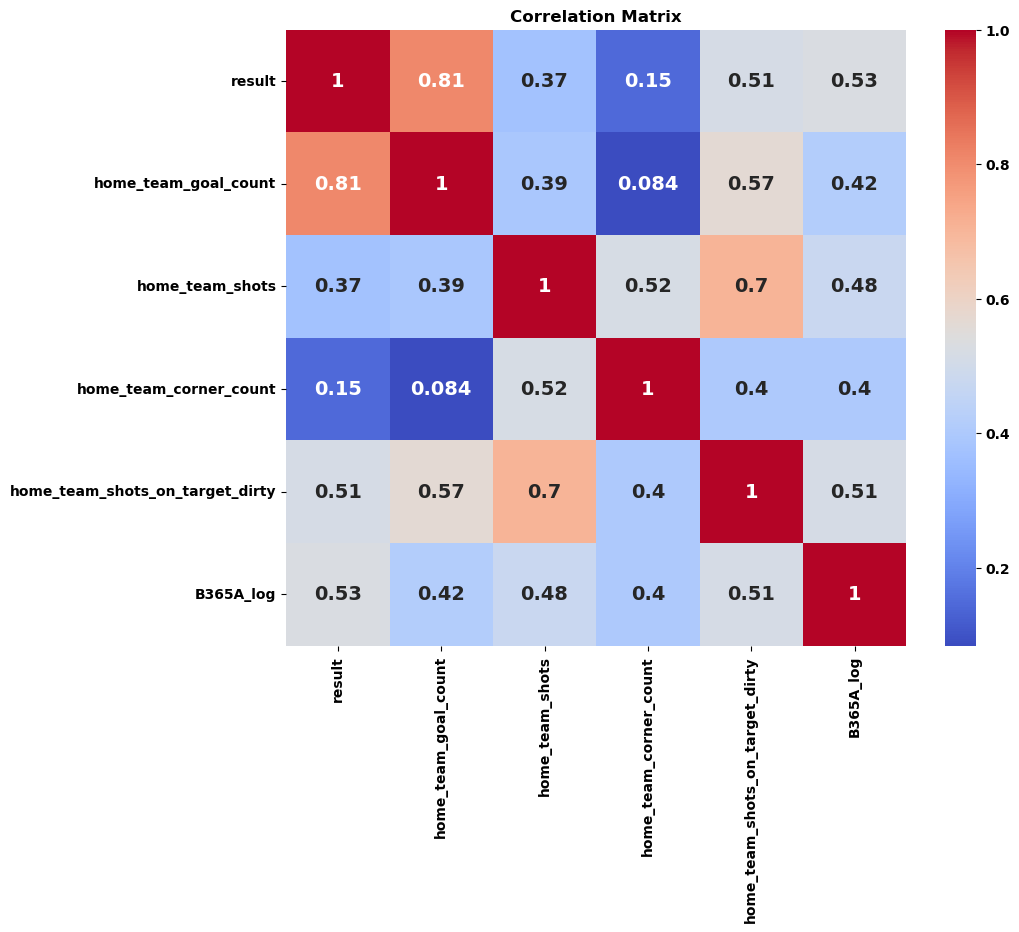

In [92]:
# Select only the numeric columns
numeric_columns = matches_info_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = numeric_columns.drop(columns=['performance_rank_home','away_performance_rank','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)'])

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()


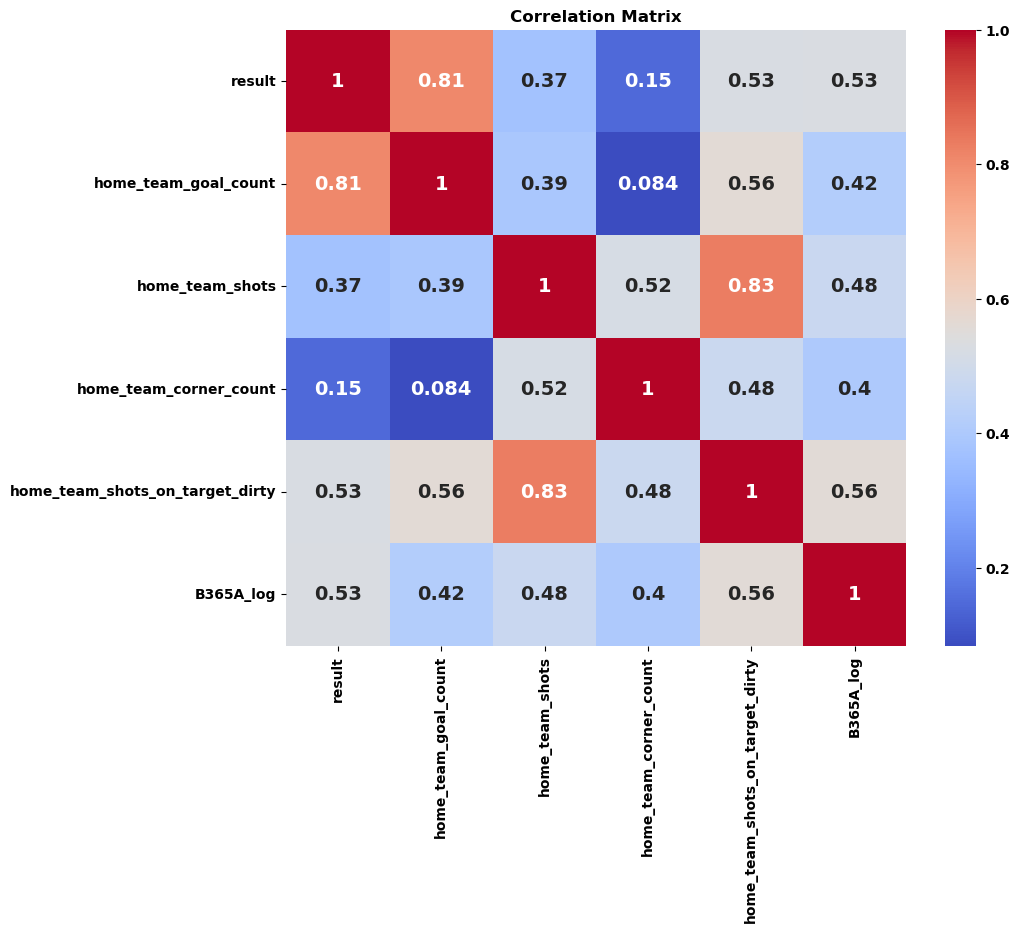

In [93]:
# Select only the numeric columns
numeric_columns = matches_knn_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = matches_knn_df.drop(columns=['performance_rank_home','away_performance_rank','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)'])

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()



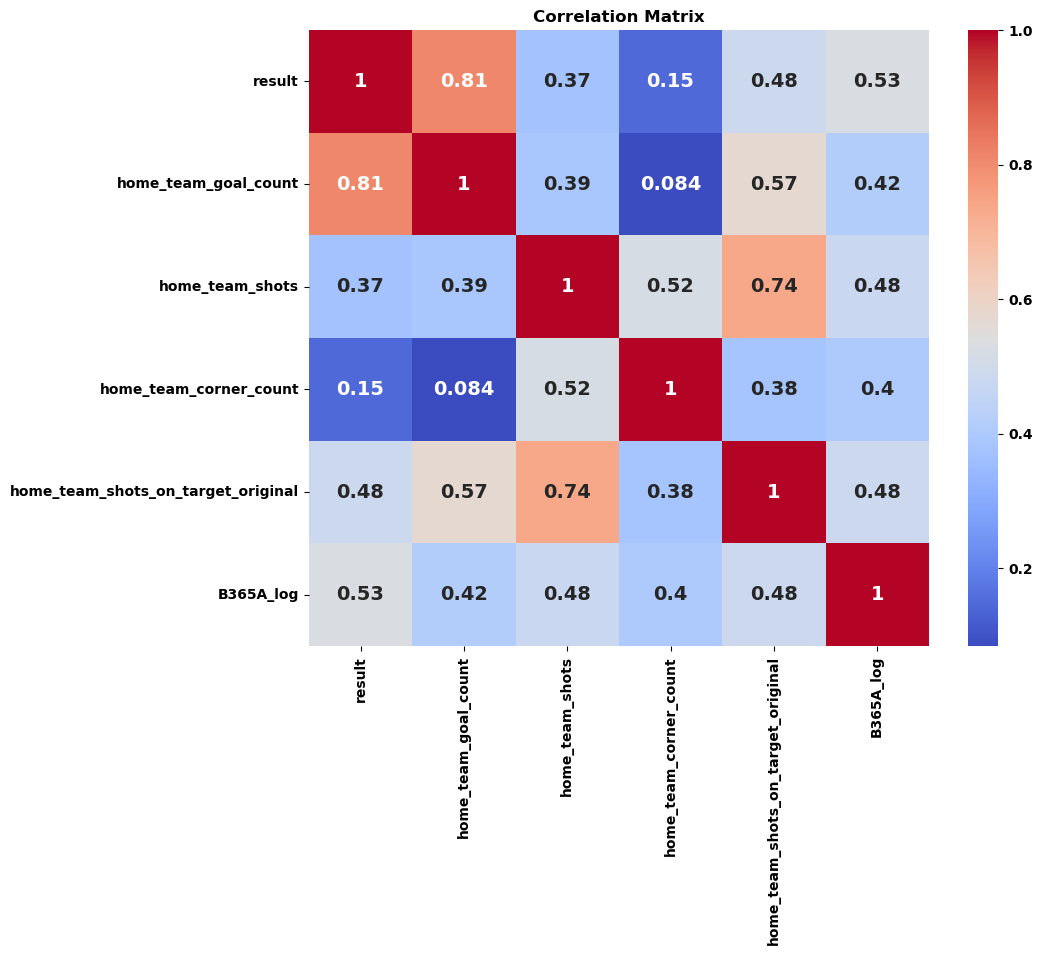

In [94]:
main_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)

# Select only the numeric columns
numeric_columns = main_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = main_df[['result', 'home_team_goal_count', 'home_team_shots', 
                           'home_team_corner_count', 'home_team_shots_on_target_original', 'B365A_log']]

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()



In [96]:
# Obter os índices das linhas com NaN em matches_knn
nan_indices = matches_info_df.index[matches_info_df['home_team_shots_on_target_dirty'].isna()]

# Selecionar as linhas correspondentes em matches_info_df
nan_data_original_main = main_df.loc[nan_indices, ['home_team_shots_on_target_original']]

# Selecionar as linhas correspondentes em matches_info_df
nan_data_original_knn = matches_knn_df.loc[nan_indices, ['home_team_shots_on_target_dirty']]

# Concatenar os dataframes em duas colunas
comparison_df = pd.concat([nan_data_original_main, nan_data_original_knn], axis=1)
comparison_df

,home_team_shots_on_target_original,home_team_shots_on_target_dirty
1,-0.600000,-0.456511
5,-0.200000,-0.094025
8,-0.466667,-0.395915
10,-0.733333,-0.419507
12,-0.600000,-0.615385
...,...,...
362,-0.066667,-0.125209
365,0.066667,-0.382096
370,-0.600000,-0.538462
372,0.200000,0.077269


a correlação aumentar é esperado, visto que o knn foi imputado utilizando essas colunas, ainda mais que esperamos que a medida que um time finalize mais, exista mais chutes no gol

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the covariance matrix for the selected numeric columns
corr_matrix = matches_knn_df.corr('spearman')
corr_matrix

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,B365A_log
result,1.000000,0.447593,-0.375821,0.273234,-0.196324,0.807843,0.372580,0.146393,0.526400,0.529997
performance_rank_home,0.447593,1.000000,-0.052632,0.662761,0.004600,0.372538,0.299043,0.207139,0.410773,0.650890
away_performance_rank,-0.375821,-0.052632,1.000000,-0.011191,0.762647,-0.274403,-0.387484,-0.333996,-0.395384,-0.690207
Pre-Match PPG (Home),0.273234,0.662761,-0.011191,1.000000,0.218623,0.250378,0.155004,0.148545,0.241913,0.453351
Pre-Match PPG (Away),-0.196324,0.004600,0.762647,0.218623,1.000000,-0.133620,-0.275323,-0.209002,-0.275358,-0.533720
home_team_goal_count,0.807843,0.372538,-0.274403,0.250378,-0.133620,1.000000,0.390270,0.083770,0.562612,0.416232
home_team_shots,0.372580,0.299043,-0.387484,0.155004,-0.275323,0.390270,1.000000,0.517106,0.831425,0.475246
home_team_corner_count,0.146393,0.207139,-0.333996,0.148545,-0.209002,0.083770,0.517106,1.000000,0.478638,0.401184
home_team_shots_on_target_dirty,0.526400,0.410773,-0.395384,0.241913,-0.275358,0.562612,0.831425,0.478638,1.000000,0.558762
B365A_log,0.529997,0.650890,-0.690207,0.453351,-0.533720,0.416232,0.475246,0.401184,0.558762,1.000000


In [ ]:
# o sem inputar
print(matches_info_df.home_team_shots_on_target_dirty.describe())
print()

# o imputado
print(matches_knn_df.home_team_shots_on_target_dirty.describe())
print()

# o original
print(main_df.home_team_shots_on_target_original.describe())
# a media e a mediana se mantiveram um pouco mais estaveis
# a mediana nem tanto, ver isso depois

count    266.000000
mean      -0.207519
std        0.353636
min       -1.000000
25%       -0.466667
50%       -0.200000
75%        0.033333
max        1.000000
Name: home_team_shots_on_target_dirty, dtype: float64
count    380.000000
mean      -0.283841
std        0.297649
min       -1.000000
25%       -0.466667
50%       -0.320765
75%       -0.101426
max        0.846154
Name: home_team_shots_on_target_dirty, dtype: float64
count    380.000000
mean      -0.231930
std        0.362098
min       -1.000000
25%       -0.466667
50%       -0.200000
75%       -0.066667
max        1.000000
Name: home_team_shots_on_target_original, dtype: float64


In [ ]:
ordered_df = ['home_team_shots_on_target']
matches_knn_df = matches_knn_df[ordered_df]

temporary_df = pd.read_csv("matches_info_df.csv", index_col=0)
temporary_df['home_team_shots_on_target'] = matches_knn_df['home_team_shots_on_target']
matches_knn_df = temporary_df

matches_knn_df.to_csv('matches_knn_df.csv')
matches_knn_df

KeyError: "None of [Index(['home_team_shots_on_target'], dtype='object')] are in the [columns]"